In [68]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

In [69]:
import pn_taylor_eob
import numpy as np
import matplotlib.pyplot as plt

In [70]:
modes = [(2,2),(2,1),(3,3),(3,2),(4,4),(4,3),(5,5),(5,4)]
wf = pn_taylor_eob.generate_pn_waveform_eob(1.999973329931, modes=modes, f_min=13)

# modes = list(wf['hlm'].keys())

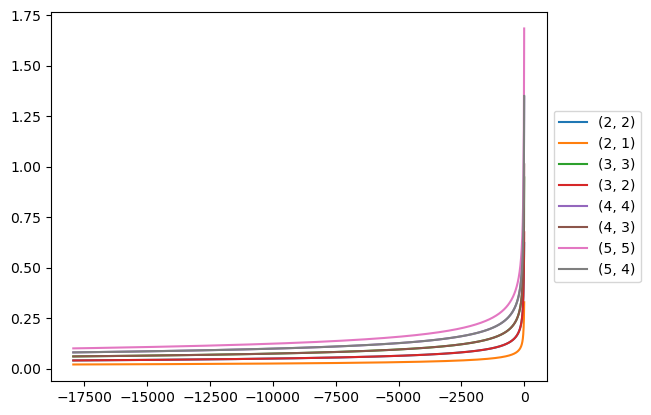

In [71]:
plt.figure()
for mode in wf['hlm'].keys():
    plt.plot(wf['t'][:-1], np.diff(np.unwrap(np.angle(wf['hlm'][mode]))), label=mode)
    #plt.plot(wf['t'], wf['hlm'][mode].real, label=mode)
    #plt.plot(wf['t'], np.abs(wf['hlm'][mode]), label=mode)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [72]:
import hybrid_utils

In [73]:
# psi0 = -np.pi
# # psi0 = np.pi
# # psi0 = 0

# hlms = wf['hlm'].copy()
# for mode in hlms.keys():
#     hlms[mode] = hlms[mode] * np.exp(1.j*psi0)
# wf['hlm'] = hlms.copy()

wf = hybrid_utils.compute_amplitude(wf)
wf = hybrid_utils.compute_phase(wf)
wf = hybrid_utils.compute_frequency(wf)

In [74]:
wf.keys()

dict_keys(['t', 'hlm', 'amp', 'phase', 'freq'])

In [75]:
# I don't think this equation is quite correct.
# it doesn't seem to work for the (4,4) mode..
def delta_phi_fn(m):
    z = (-1)*(-1.j)**m
    return np.arctan2(z.imag, z.real)

In [76]:
###
# from https://git.ligo.org/hector.estelles/waveform-conventions/-/tree/master/

def UIBMod(xarray, angle):

	""" It is simply a custom modulo function """

	ret = np.zeros(len(xarray))
	for i, x in enumerate(xarray):
	    mod = x%angle
    
	    if mod>angle/2:
	        ret[i] = mod - angle
	    else:
	        ret[i] = mod
	return ret


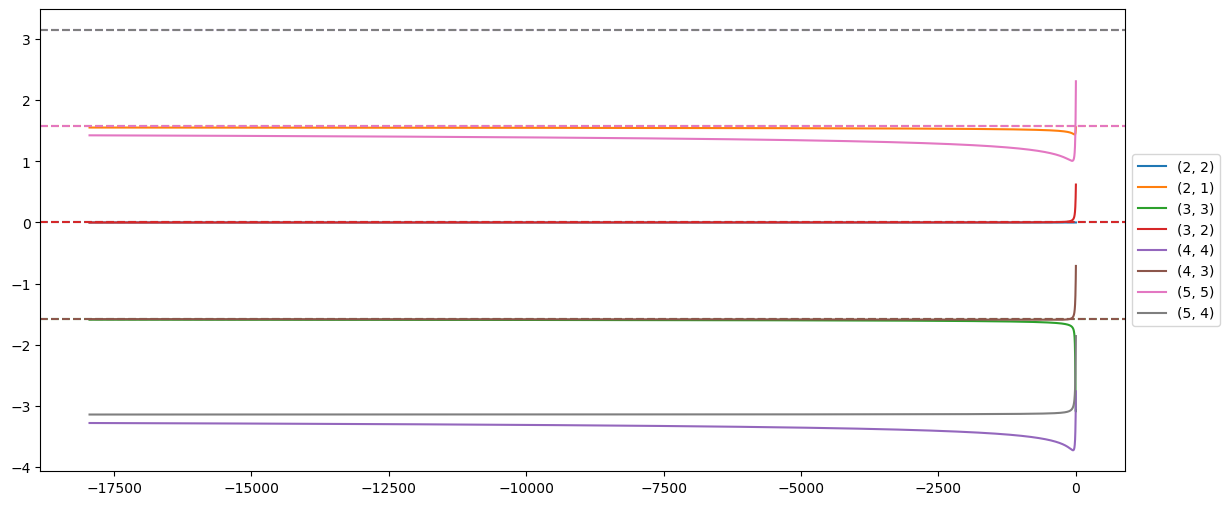

In [77]:
plt.figure(figsize=(14, 6))

for i, mode in enumerate(modes):
    l, m = mode
    z = wf['phase'][l,m] - m*wf['phase'][2,2]/2
    # plt.plot(wf['t'], UIBMod(z,1.99*np.pi), label=mode)
    # plt.plot(wf['t'], np.unwrap(z, discont=1.1*np.pi, period=2.1*np.pi), label=mode)
    plt.plot(wf['t'], np.unwrap(z), label=mode)
    plt.axhline(delta_phi_fn(m), c=f"C{i}", ls='--')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

(-0.002, 0.002)

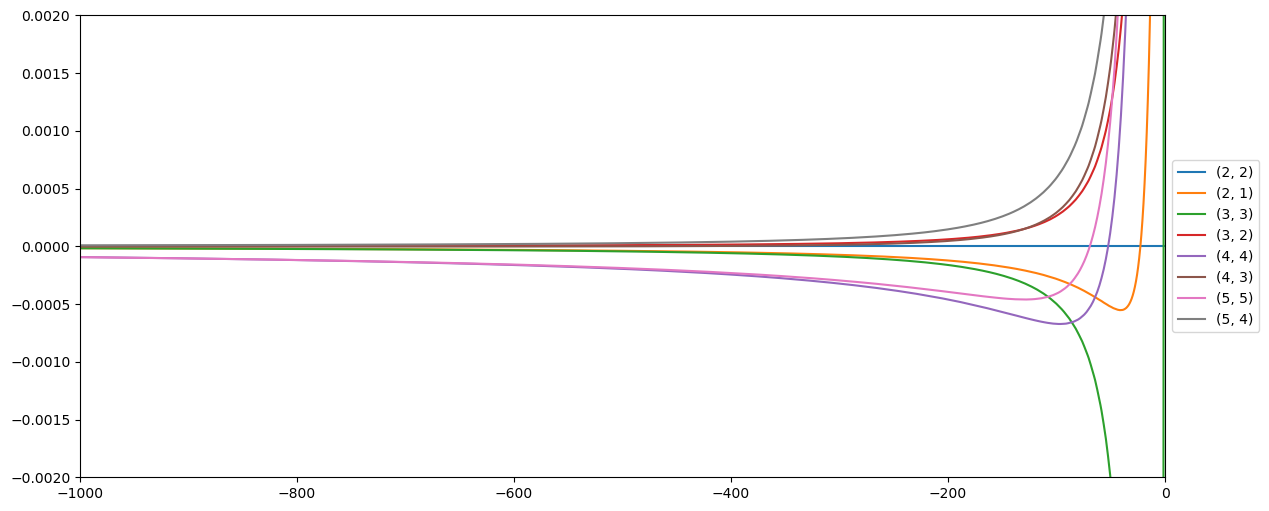

In [78]:
plt.figure(figsize=(14, 6))

for i, mode in enumerate(modes):
    l, m = mode
    z = wf['freq'][l,m] - m*wf['freq'][2,2]/2
    plt.plot(wf['t'], z, label=mode)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlim(-100, 10)
plt.xlim(-1000, 0)
plt.ylim(-0.002,0.002)